In [1]:
import statsmodels.stats.multitest as smt
import matplotlib.pyplot as plt
from collections import Counter
from copy import deepcopy
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import re


pd.set_option('display.max_columns',None)

In [2]:
def Get_OLS_Fit(y=None, x=None, df_sub=None):
    df_sub = df_sub[(df_sub[x].notnull()) & (df_sub[y].notnull())]
    formula = '{} ~ {}'.format(y,x)
    mod = ols(formula, data=df_sub)
    res = mod.fit()   
    return res

In [3]:
df = pd.read_table('..//data/Data_AnAge.csv', sep=',', index_col=0)

In [4]:
df_mammalia = df[df.taxon_class=='Mammalia']

In [5]:
len(df_mammalia)

1322

In [6]:
len(Counter(df_mammalia.taxon_species))

1321

In [7]:
df_mammalia[df_mammalia.taxon_species=='Canis lupus']

,HAGRID,taxID,Genus_species,taxon_kindom,taxon_phylum,taxon_class,taxon_order,taxon_family,taxon_genus,taxon_species,Common name,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),Growth rate (1/days),Maximum longevity (yrs),Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
2028,2073,9615,Canis familiaris,Eukaryota,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,Domestic dog,510.0,510.0,63.0,NaN,6.0,NaN,NaN,NaN,NaN,40000.0,0.0244,27.0,1330,captivity,large,acceptable,0.02,3.0,NaN,NaN,NaN,"2,18,75,121,199,200,201,202,203,204,205,206,20..."
2030,2075,9612,Canis lupus,Eukaryota,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,Gray wolf,669.0,669.0,62.0,47.0,6.0,0.8,365.0,450.0,5250.0,26625.0,0.0177,20.6,671,captivity,large,high,NaN,NaN,NaN,NaN,311.45,"434,455,671,676,680,731,817,923,1017,1143,1188"


In [8]:
df_mammalia = df_mammalia[df_mammalia.Genus_species!='Canis familiaris']

In [9]:
len(df_mammalia)

1321

In [10]:
df_mammalia_growth_data = pd.DataFrame()

df_mammalia_growth_data['taxon_species'] = df_mammalia['taxon_species']
df_mammalia_growth_data['taxon_genus']   = df_mammalia['taxon_genus']
df_mammalia_growth_data['taxon_family']  = df_mammalia['taxon_family']
df_mammalia_growth_data['taxon_order']   = df_mammalia['taxon_order']


df_mammalia_growth_data['Mass_ori']  = df_mammalia['Adult weight (g)']
df_mammalia_growth_data['Mass_log']  = np.log10(df_mammalia['Adult weight (g)'])
df_mammalia_growth_data['Maximum_longevity_ori'] = df_mammalia['Maximum longevity (yrs)']
df_mammalia_growth_data['Maximum_longevity_log'] = np.log10(df_mammalia_growth_data['Maximum_longevity_ori'])
df_mammalia_growth_data['generateion_time_ori'] = df_mammalia['Gestation/Incubation (days)']+df_mammalia['Female maturity (days)']
df_mammalia_growth_data['generateion_time_log'] = np.log10(df_mammalia_growth_data['generateion_time_ori'])

4.663494609378762* adult_mass**0.15985213082302574
1008


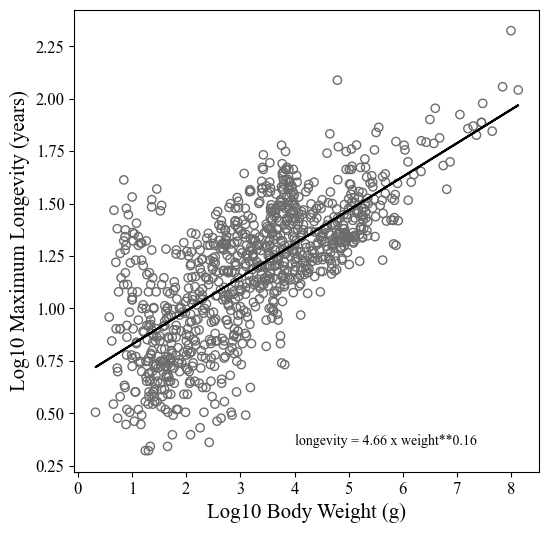

In [11]:
fig = plt.figure(figsize=(6,6))
import matplotlib.patches as mpatches
plt.rcParams['font.sans-serif'] = ['Times New Roman']

df_plot = df_mammalia_growth_data[(df_mammalia_growth_data.Mass_log.notnull()) & 
                                  (df_mammalia_growth_data.Maximum_longevity_log.notnull())]

plt.scatter(df_plot.Mass_log
           ,df_plot.Maximum_longevity_log
           ,facecolor='none'
           ,edgecolor='#6C6C6C')

def Growth_scaling(ols_model):
    intercept = ols_model.params[0]
    slope = ols_model.params[1]
    a = 10**intercept
    b = slope
    print( '{}* adult_mass**{}'.format(a,b) )

res = Get_OLS_Fit(y='Maximum_longevity_log', x='Mass_log', df_sub=df_plot)

plt.plot(df_plot.Mass_log
        ,res.fittedvalues
        ,c='k')

# test
# plt.plot(df_plot.Mass_log
#         ,np.log10(4.66*df_plot['Mass_ori']**0.16)
#         ,c='r'
#         ,linestyle='--')

Growth_scaling(res)

plt.text(x=4
        ,y=0.35
        ,s='longevity = 4.66 x weight**0.16')

plt.xlabel('Log10 Body Weight (g)', fontsize=15)
plt.ylabel('Log10 Maximum Longevity (years)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# plt.savefig('..//data//ML_mass_residuals_1008.pdf',dpi=300,bbox_inches='tight')
print(len(df_plot))


plt.show()

In [12]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Maximum_longevity_log   R-squared:                       0.498
Model:                               OLS   Adj. R-squared:                  0.498
Method:                    Least Squares   F-statistic:                     998.7
Date:                   Wed, 22 Nov 2023   Prob (F-statistic):          8.39e-153
Time:                           09:03:52   Log-Likelihood:                 53.360
No. Observations:                   1008   AIC:                            -102.7
Df Residuals:                       1006   BIC:                            -92.89
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6687      0.018     37.401      0.000       0.634       0.704
Mass_log       0.1599      0.005     31.603      0.000       0.150       0.170
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   0.600
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                6.225
Skew:                           0.136   Prob(JB):                       0.0445
Kurtosis:                       3.273   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

100.8783336207317*Adult mass**0.2127409178121542
0.5353172514610931
951


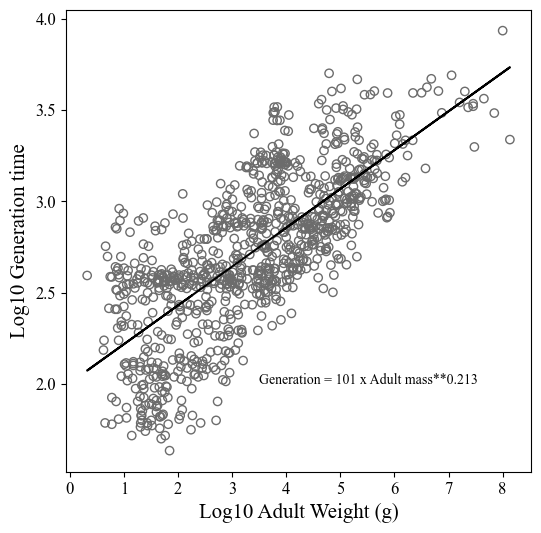

In [13]:
fig = plt.figure(figsize=(6,6))
import matplotlib.patches as mpatches
plt.rcParams['font.sans-serif'] = ['Times New Roman']

df_plot = df_mammalia_growth_data[(df_mammalia_growth_data.Mass_log.notnull()) &
                                  (df_mammalia_growth_data.generateion_time_log.notnull())]

plt.scatter(df_plot.Mass_log
           ,df_plot.generateion_time_log
           ,facecolor='none'
           ,edgecolor='#6C6C6C')

res_bm = Get_OLS_Fit(y='generateion_time_log', x='Mass_log', df_sub=df_plot)

def Growth_scaling(ols_model):
    intercept = res_bm.params[0]
    slope = res_bm.params[1]
    a = 10**intercept
    b = slope
    print( '{}*Adult mass**{}'.format(a,b) )

plt.plot(df_plot.Mass_log
        ,res_bm.fittedvalues
        ,c='k')



# test
# plt.plot(df_plot.Mass_log
#         ,np.log10(101*df_plot['Mass_ori']**0.213)
#         ,c='r'
#         ,linestyle='--')

plt.text(x=3.5
        ,y=2
        ,s='Generation = 101 x Adult mass**0.213')

Growth_scaling(res_bm)

plt.xlabel('Log10 Adult Weight (g)', fontsize=15)
plt.ylabel('Log10 Generation time', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

print(res_bm.rsquared_adj)
print(len(df_plot))
# plt.savefig('..//data//GT_mass_residuals_951.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [14]:
res_bm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     generateion_time_log   R-squared:                       0.536
Model:                              OLS   Adj. R-squared:                  0.535
Method:                   Least Squares   F-statistic:                     1095.
Date:                  Wed, 22 Nov 2023   Prob (F-statistic):          2.49e-160
Time:                          09:04:05   Log-Likelihood:                -172.08
No. Observations:                   951   AIC:                             348.2
Df Residuals:                       949   BIC:                             357.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0038      0.024     85.102      0.000       1.958       2.050
Mass_log       0.2127      0.006     33.097      0.000       0.200       0.225
==============================================================================
Omnibus:                       16.024   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.849
Skew:                           0.072   Prob(JB):                      0.00727
Kurtosis:                       2.523   Cond. No.                         9.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.27027888402795097*GT**0.6543561675917642
778


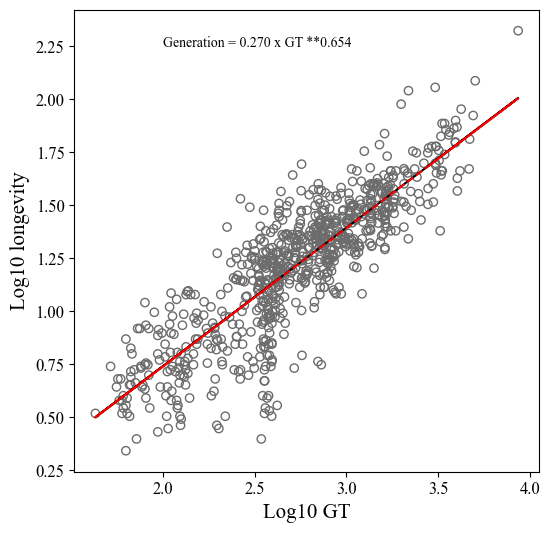

In [15]:
fig = plt.figure(figsize=(6,6))
import matplotlib.patches as mpatches
plt.rcParams['font.sans-serif'] = ['Times New Roman']

df_plot = df_mammalia_growth_data[(df_mammalia_growth_data.Maximum_longevity_log.notnull()) &
                                  (df_mammalia_growth_data.generateion_time_log.notnull())]

plt.scatter(df_plot.generateion_time_log
           ,df_plot.Maximum_longevity_log
           ,facecolor='none'
           ,edgecolor='#6C6C6C')

res_bm = Get_OLS_Fit(y='Maximum_longevity_log', x='generateion_time_log', df_sub=df_plot)

def Growth_scaling(ols_model):
    intercept = res_bm.params[0]
    slope = res_bm.params[1]
    a = 10**intercept
    b = slope
    print( '{}*GT**{}'.format(a,b) )

plt.plot(df_plot.generateion_time_log
        ,res_bm.fittedvalues
        ,c='k')

# # test
plt.plot(df_plot.generateion_time_log
        ,np.log10(0.270*df_plot['generateion_time_ori']**0.654)
        ,c='r'
        ,linestyle='--')

plt.text(x=2
        ,y=2.25
        ,s='Generation = 0.270 x GT **0.654')

Growth_scaling(res_bm)

plt.xlabel('Log10 GT', fontsize=15)
plt.ylabel('Log10 longevity', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

print(len(df_plot))
# plt.savefig('..//data//ML_GT_residuals_778.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [16]:
res_bm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Maximum_longevity_log   R-squared:                       0.726
Model:                               OLS   Adj. R-squared:                  0.726
Method:                    Least Squares   F-statistic:                     2058.
Date:                   Wed, 22 Nov 2023   Prob (F-statistic):          1.72e-220
Time:                           09:04:14   Log-Likelihood:                 274.17
No. Observations:                    778   AIC:                            -544.3
Df Residuals:                        776   BIC:                            -535.0
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5682      0.040    -14.255      0.000      -0.646      -0.490
generateion_time_log     0.6544      0.014     45.370      0.000       0.626       0.683
==============================================================================
Omnibus:                       59.206   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.815
Skew:                          -0.552   Prob(JB):                     2.58e-21
Kurtosis:                       4.306   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""